In [34]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('./german_credit_data.csv', index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [36]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder

cat = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

le = LabelEncoder()

for c in cat:
    df[c] = le.fit_transform(df[c])
    

X, Y = df.iloc[:, :-1], df.iloc[:, -1]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 100)

train_X = scale(train_X)
test_X = scale(test_X)

In [47]:
lasso = linear_model.Lasso()
lasso.fit(train_X, train_Y)

# Hyperparameter
alg = 'Lasso'

param_ls = {
    'alpha': np.logspace(0, 10, 100)
}

ls_cv = GridSearchCV(lasso, param_grid = param_ls, cv=10)
ls_cv.fit(train_X, train_Y)

lasso = ls_cv.best_estimator_
print(ls_cv.best_params_)

{'alpha': 1.0}


In [48]:
lasso = linear_model.Lasso(alpha=1)
lasso.fit(train_X, train_Y)

train_Y_hat = lasso.predict(train_X)
test_Y_hat = lasso.predict(test_X)
mse_train = mean_squared_error(train_Y, train_Y_hat)
mse_test = mean_squared_error(test_Y, test_Y_hat)

print(f'{alg} | Train MSE: {mse_train:.5f}, Test MSE: {mse_test:.5f}')
print(lasso.score(test_X, test_Y))

Lasso | Train MSE: 0.21197, Test MSE: 0.20222
-0.003100198412698374


In [49]:
logi = linear_model.LogisticRegression()
logi.fit(train_X, train_Y)

# Hyperparameter
alg = 'Logistic'

param_logi = {
    'C': np.logspace(-3, 2, 6)
}

logi_cv = GridSearchCV(logi, param_grid = param_logi, cv=10)
logi_cv.fit(train_X, train_Y)

logi = logi_cv.best_estimator_
print(logi_cv.best_params_)

{'C': 0.1}


In [50]:
logi = linear_model.LogisticRegression(C=0.1)
logi.fit(train_X, train_Y)

train_Y_hat = logi.predict(train_X)
test_Y_hat = logi.predict(test_X)
mse_train = mean_squared_error(train_Y, train_Y_hat)
mse_test = mean_squared_error(test_Y, test_Y_hat)

print(f'{alg} | Train MSE: {mse_train:.5f}, Test MSE: {mse_test:.5f}')
print(lasso.score(test_X, test_Y))

Logistic | Train MSE: 0.26125, Test MSE: 0.25500
-0.003100198412698374


In [51]:
ridge = linear_model.Ridge()
ridge.fit(train_X, train_Y)

# Hyperparameter
alg = 'Ridge'

param_rg = {
    'alpha': np.logspace(0, 20, 100)
}

rg_cv = GridSearchCV(ridge, param_grid = param_rg, cv=10)
rg_cv.fit(train_X, train_Y)

ridge = rg_cv.best_estimator_
print(rg_cv.best_params_)

{'alpha': 65.79332246575679}


In [52]:
ridge = linear_model.Lasso(alpha=104.76157527896652)
ridge.fit(train_X, train_Y)

train_Y_hat = ridge.predict(train_X)
test_Y_hat = ridge.predict(test_X)
mse_train = mean_squared_error(train_Y, train_Y_hat)
mse_test = mean_squared_error(test_Y, test_Y_hat)

print(f'{alg} | Train MSE: {mse_train:.5f}, Test MSE: {mse_test:.5f}')
print(lasso.score(test_X, test_Y))

Ridge | Train MSE: 0.21197, Test MSE: 0.20222
-0.003100198412698374


## Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000


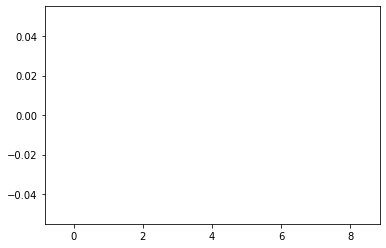

In [53]:
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000


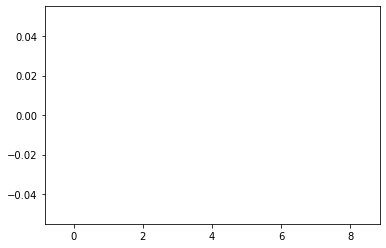

In [54]:
importance = ridge.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Age: 0.13328040046271863
Sex: 0.13532345467360446
Job: 0.009515477124959575
Housing: -0.018034798684047695
Saving accounts: 0.30728374683854925
Checking account: 0.7407378447328512
Credit amount: -0.1298626678722374
Duration: -0.36036874111763234
Purpose: 0.18798679143483607


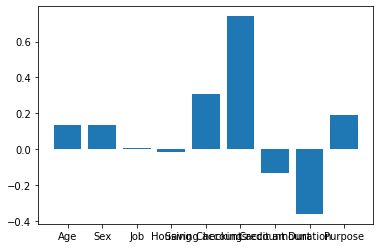

In [55]:
importance = logi.coef_
importance = pd.Series(importance[0])
column = X.columns
importance
# summarize feature importance
for i,v in enumerate(importance):
    print(f'{column[i]}: {v}')
# plot feature importance
plt.bar([x for x in column], importance)
plt.show()